<br/>

## Importing necessary modules

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from download import download
from datetime import datetime

<br/>

## Downloading the dataset
The **download** will download the dataset from the given link, unzip it and store it in **/tmp/aq** folder.

In [28]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip',
                '/tmp/aq', kind = 'zip')

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


<br/>

## Load the dataset

In [29]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 encoding='ISO-8859-1')

<br/>

## Reconnaissance
<br/>

#### Dataset

In [30]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


**Note:**  
<br/>
PM2.5 : Particular matter (2.5 micrometer in dia)  
PM10  : Particular matter (10 micrometer in dia)

<br/>

#### Info

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


<br/>

#### Shape

In [32]:
df.shape

(35064, 18)

<br/>

#### Describe

In [33]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


<br/>

## Combining Year-Month-Day-Hour

In [34]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [35]:
df1 = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                 parse_dates = [['year', 'month', 'day', 'hour']], date_parser = convert_to_date, keep_date_col = True)

**Note:**  
**keep_date_col = True** will keep the year, month, day, hour columns.  
If we set it to **False**, the year, month, day, hour columns will be removed from the dataset.

In [36]:
df1.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


<br/>

#### Info

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

<br/>

## Checking out the missing values

In [38]:
df1.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

<br/>

## Changing the data type of month into numeric

In [39]:
df1['month'] = pd.to_numeric(df1['month'])

In [40]:
df1['month'].dtypes

dtype('int64')

<br/>

### Making a copy

In [41]:
df_non_indexed = df1.copy()

<br/>

## Set the year 'year_month_day_hour' to index
Setting Timestamp as index, allow us to access the dataset more easily.

In [42]:
df1 = df1.set_index('year_month_day_hour')

In [43]:
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


<br/>

#### If I would like to get the data between '2014-06-23' to '2014-06-24'

In [44]:
df1.loc['2014-06-23' : '2014-06-24']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2014-06-23 00:00:00,11497,2014,6,23,0,10.0,5.0,2.0,8.0,100.0,48.0,18.4,1000.3,15.1,0.0,NNW,1.4,Dingling
2014-06-23 01:00:00,11498,2014,6,23,1,12.0,5.0,2.0,7.0,100.0,44.0,18.1,1000.2,14.6,0.0,NW,1.4,Dingling
2014-06-23 02:00:00,11499,2014,6,23,2,11.0,6.0,2.0,6.0,100.0,38.0,18.1,1000.3,14.0,0.0,ENE,1.3,Dingling
2014-06-23 03:00:00,11500,2014,6,23,3,11.0,7.0,2.0,6.0,100.0,46.0,19.2,1000.4,13.6,0.0,NNW,1.3,Dingling
2014-06-23 04:00:00,11501,2014,6,23,4,11.0,9.0,2.0,7.0,100.0,56.0,17.6,1000.7,14.1,0.0,NNW,1.1,Dingling
2014-06-23 05:00:00,11502,2014,6,23,5,10.0,6.0,2.0,7.0,100.0,60.0,18.5,1000.8,14.6,0.0,NNW,0.9,Dingling
2014-06-23 06:00:00,11503,2014,6,23,6,7.0,18.0,2.0,10.0,100.0,54.0,22.6,1001.1,14.4,0.0,ENE,1.2,Dingling
2014-06-23 07:00:00,11504,2014,6,23,7,8.0,25.0,2.0,8.0,100.0,60.0,24.2,1001.0,15.4,0.0,W,1.4,Dingling
2014-06-23 08:00:00,11505,2014,6,23,8,15.0,11.0,2.0,8.0,100.0,69.0,26.5,1000.7,15.2,0.0,SE,0.9,Dingling


<br/>

#### If I would like to get the data between '2014' to '2015'

In [45]:
df1.loc['2014' : '2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,7345,2014,1,1,0,27.0,104.0,12.0,9.0,NaN,NaN,6.8,1003.7,-15.9,0.0,WSW,5.2,Dingling
2014-01-01 01:00:00,7346,2014,1,1,1,25.0,86.0,12.0,9.0,500.0,63.0,6.5,1003.6,-16.2,0.0,W,3.6,Dingling
2014-01-01 02:00:00,7347,2014,1,1,2,27.0,85.0,14.0,9.0,400.0,63.0,6.4,1003.4,-15.6,0.0,WNW,5.3,Dingling
2014-01-01 03:00:00,7348,2014,1,1,3,34.0,98.0,19.0,15.0,400.0,56.0,6.2,1002.9,-15.8,0.0,WNW,4.7,Dingling
2014-01-01 04:00:00,7349,2014,1,1,4,32.0,102.0,18.0,15.0,400.0,33.0,6.1,1002.7,-15.2,0.0,W,3.5,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


<br/>

#### If I would like to take the only pm2.5 feature

In [46]:
pm2 = df1['PM2.5']
pm2.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<br/>

#### Let's plot the PM2.5 data

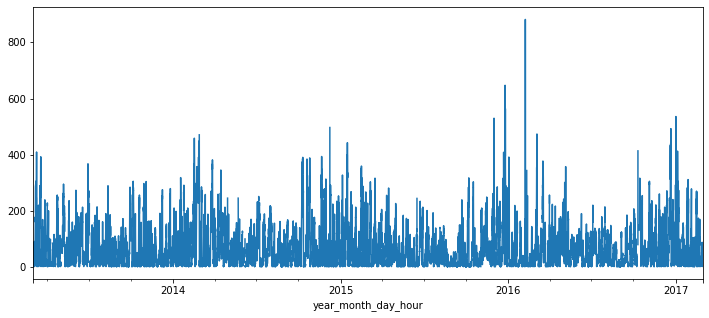

In [47]:
plt.figure(figsize = (12, 5))
pm2.plot()
plt.show()

<br/>

#### Let's get into a little bit deeper

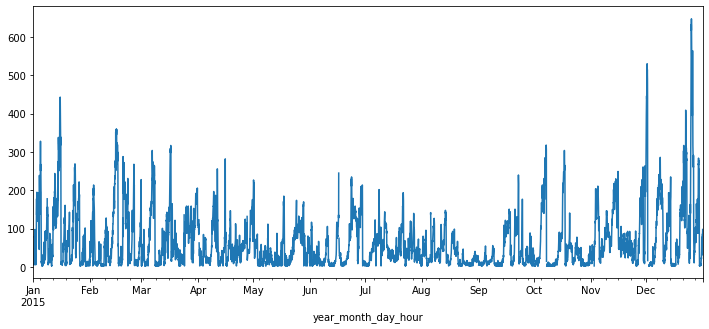

In [48]:
plt.figure(figsize = (12, 5))

df1_2015 = df1.loc['2015']
pm2_2015 = df1_2015['PM2.5']
pm2_2015.plot()

plt.show()

<br/>

## Take visualization in an another level

In [56]:
plt.figure(figsize = (12, 5))

fig1 = px.line(df_non_indexed, x = 'year_month_day_hour', y = 'PM2.5')
fig1.update_xaxes(rangeslider_visible = True)

fig1.show()

<Figure size 864x360 with 0 Axes>

<br/>

## Overlapping
Instead of plotting 2 different graphs of data 2014 and 2015, we can overlap the data in one graph. It will allow us see the difference more explicitly.

In [50]:
# Creating two new dataframe
df_2014 = df1['2014'].reset_index()
df_2015 = df1['2015'].reset_index()

# Making the dataset to day level from hour level for better visualization
df_2014['month_day'] = df_2014.apply(lambda x : str(x['month'])+'-'+str(x['day']), axis = 1)
df_2015['month_day'] = df_2015.apply(lambda x : str(x['month'])+'-'+str(x['day']), axis = 1)

In [51]:
df_2014.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,month_day
0,2014-01-01 00:00:00,7345,2014,1,1,0,27.0,104.0,12.0,9.0,NaN,NaN,6.8,1003.7,-15.9,0.0,WSW,5.2,Dingling,1-1
1,2014-01-01 01:00:00,7346,2014,1,1,1,25.0,86.0,12.0,9.0,500.0,63.0,6.5,1003.6,-16.2,0.0,W,3.6,Dingling,1-1
2,2014-01-01 02:00:00,7347,2014,1,1,2,27.0,85.0,14.0,9.0,400.0,63.0,6.4,1003.4,-15.6,0.0,WNW,5.3,Dingling,1-1
3,2014-01-01 03:00:00,7348,2014,1,1,3,34.0,98.0,19.0,15.0,400.0,56.0,6.2,1002.9,-15.8,0.0,WNW,4.7,Dingling,1-1
4,2014-01-01 04:00:00,7349,2014,1,1,4,32.0,102.0,18.0,15.0,400.0,33.0,6.1,1002.7,-15.2,0.0,W,3.5,Dingling,1-1


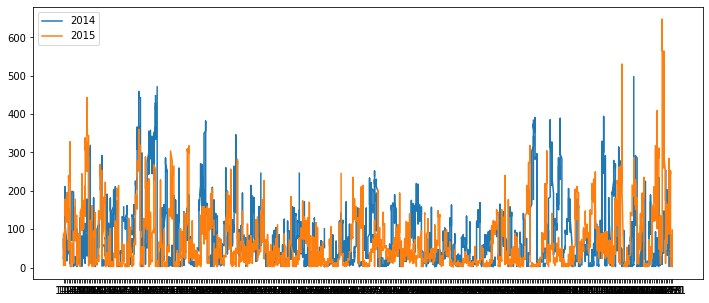

In [52]:
plt.figure(figsize = (12, 5))

plt.plot(df_2014['month_day'], df_2014['PM2.5'], label = '2014')
plt.plot(df_2015['month_day'], df_2015['PM2.5'], label = '2015')

plt.legend()
plt.show()

<br/>

## Group by "Month" and observe the basic statistics
It's univariate analysis as we are only observing the **PM2.5**.

In [58]:
df1['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

<br/>

## PM2.5 with Temperature grouped by Month
This time it's bivariate.

In [61]:
df1['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP' : ['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

<br/>

## Taking 2015 and plotting the PM2.5 and TEMP together

<Figure size 864x360 with 0 Axes>

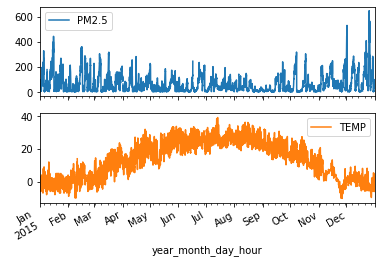

In [67]:
plt.figure(figsize = (12, 5))

df_2015 = df1['2015']
pm_temp_2015 = df_2015[['PM2.5', 'TEMP']]
pm_temp_2015.plot(subplots = True)

plt.show()

<br/>

## Let's see the frequency distribution

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'TEMP'}>]], dtype=object)

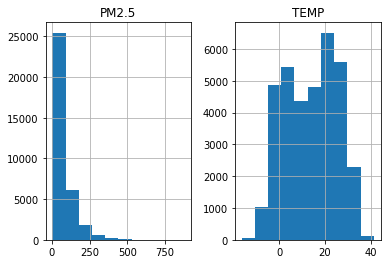

In [69]:
df1[['PM2.5', 'TEMP']].hist()

<br/>

## Creating some Lag plot
In lag plot,  
**x-axis = Current time  
y-axis = lagged period**  
<br/>

**Note:**  
A linear shape of lag plot normally suggests to choose a **Auto Regressive** model.

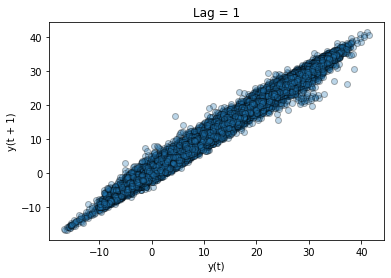

In [76]:
pd.plotting.lag_plot(df1['TEMP'], lag = 1, alpha = 0.3, edgecolor = 'black')
plt.title("Lag = 1")
plt.show()

**Conclusion for lag 1:**  
The relation is linear

<br/>


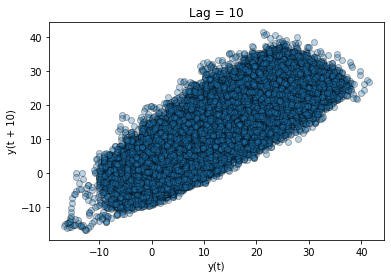

In [77]:
pd.plotting.lag_plot(df1['TEMP'], lag = 10, alpha = 0.3, edgecolor = 'black')
plt.title("Lag = 10")
plt.show()

**Conclusion for lag 10:**  
The relation isn't that linear this time.

<br/>



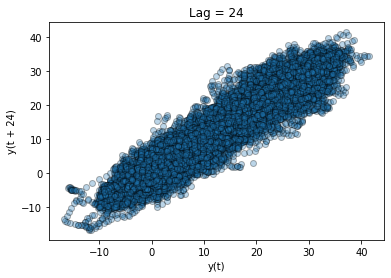

In [80]:
pd.plotting.lag_plot(df1['TEMP'], lag = 24, alpha = 0.3, edgecolor = 'black')
plt.title("Lag = 24")
plt.show()

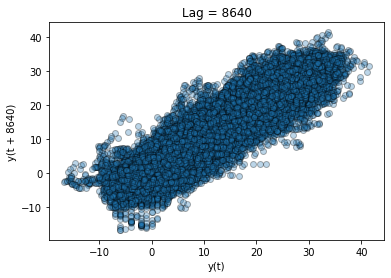

In [81]:
pd.plotting.lag_plot(df1['TEMP'], lag = 8640, alpha = 0.3, edgecolor = 'black')
plt.title("Lag = 8640")
plt.show()

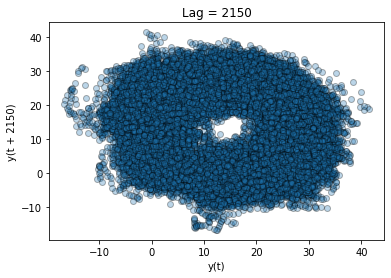

In [82]:
pd.plotting.lag_plot(df1['TEMP'], lag = 2150, alpha = 0.3, edgecolor = 'black')
plt.title("Lag = 2150")
plt.show()

**Note:**  
    There is no correlation at all.

<br/>

## Multivariate analysis (PM2.5, TEMP, Pressure)

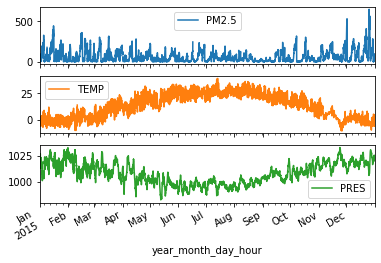

In [84]:
df_2015 = df1['2015']
pm_temp_press_2015 = df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_temp_press_2015.plot(subplots = True)

plt.show()

<br/>

## Pearson Correlation

In [89]:
corr = df1[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr()
corr

,SO2,NO2,O3,CO,PM2.5
SO2,1.000000,0.610433,-0.182096,0.529182,0.475117
NO2,0.610433,1.000000,-0.373625,0.798753,0.718170
O3,-0.182096,-0.373625,1.000000,-0.303275,-0.100542
CO,0.529182,0.798753,-0.303275,1.000000,0.802737
PM2.5,0.475117,0.718170,-0.100542,0.802737,1.000000


<br/>

## Plotting the correlation

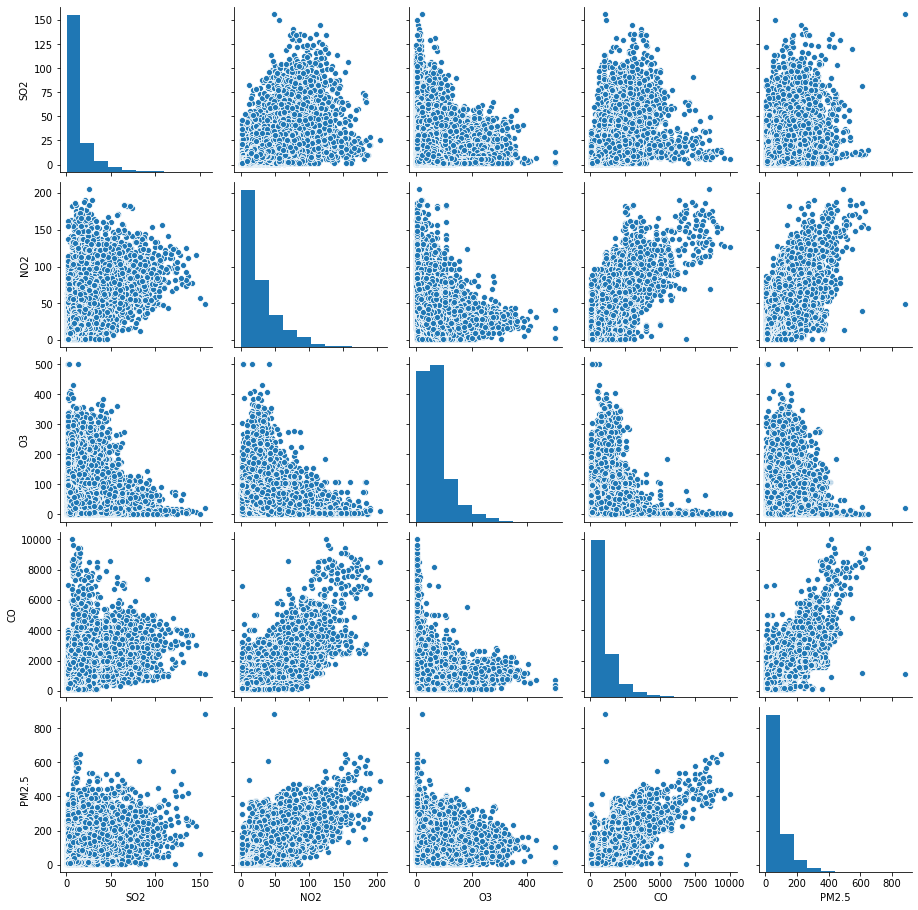

In [87]:
sns.pairplot(df1[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

<br/>

## Correlation in Heatmap

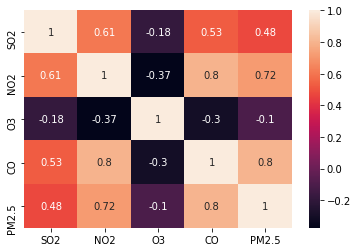

In [93]:
sns.heatmap(corr, annot = True, cbar = True)
plt.show()

<br/>

## Autocorrelation plot

In [97]:
# Making a copy
rmv_na = df1.copy()
rmv_na = rmv_na.dropna()

<br/>

##### Day level

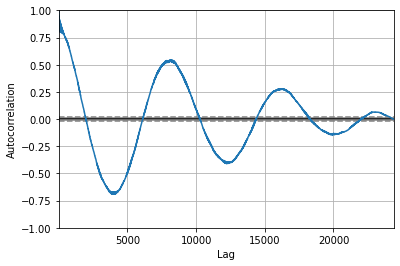

In [98]:
pd.plotting.autocorrelation_plot(rmv_na['2014':'2016']['TEMP'])
plt.show()

<br/>

## Let's see it in month level

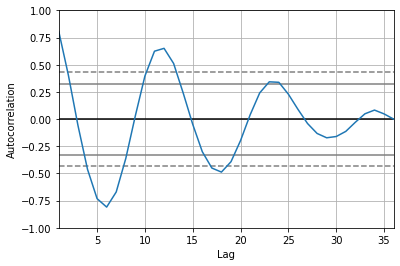

In [99]:
# Resampling to month level from day level
rmv_na['TEMP'].resample('1m').mean()

pd.plotting.autocorrelation_plot(rmv_na['2014':'2016']['TEMP'].resample('1m').mean())
plt.show()